In [22]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine, load_iris
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.ensemble import (
    RandomForestClassifier,
    StackingClassifier,
    GradientBoostingClassifier,
)
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier


In [23]:
data_wine = load_wine()
data_iris = load_iris()

X, y = data_wine.data, data_wine.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

results_wine = {}

# 1. Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
acc_rf = accuracy_score(y_test, rf_model.predict(X_test))
results_wine['Random Forest'] = acc_rf

# 2. Gradient Boosting
gb_model = GradientBoostingClassifier(random_state=42)
gb_model.fit(X_train, y_train)
acc_gb = accuracy_score(y_test, gb_model.predict(X_test))
results_wine['Gradient Boosting'] = acc_gb

# 3. Stacking RandomForest + SVC
estimators_v1 = [
    ('rf', RandomForestClassifier(n_estimators=100, random_state=42)),
    ('svc', SVC(probability=True, random_state=42))
]

# Stack
stack_v1 = StackingClassifier(estimators=estimators_v1, final_estimator=LogisticRegression())
stack_v1.fit(X_train, y_train)
acc_stack1 = accuracy_score(y_test, stack_v1.predict(X_test))
results_wine['Stacking (RF+SVC)'] = acc_stack1

# Hiperparametry
param_grid = {
    'n_estimators': [20, 50, 500],
    'learning_rate': [0.01, 0.05, 0.2, 0.5],
    'max_depth': [1,3,5,8],
    'subsample' : [0.7,1.0]
}

# Gridsearch
grid_search = GridSearchCV(estimator=GradientBoostingClassifier(random_state=42),
                           param_grid=param_grid, cv=3, scoring='accuracy', n_jobs=1)

grid_search.fit(X_train, y_train)
acc_gb_tuned = accuracy_score(y_test, grid_search.best_estimator_.predict(X_test))
results_wine['Gradient Boosting (Tuned)'] = acc_gb_tuned

# Nowy model: KNN
estimators_v2 = [
    ('rf', RandomForestClassifier(n_estimators=100, random_state=42)),
    ('svc', SVC(probability=True, random_state=42)),
    ('knn', KNeighborsClassifier(n_neighbors=5)) 
]

stack_v2 = StackingClassifier(estimators=estimators_v2, final_estimator=LogisticRegression())
stack_v2.fit(X_train, y_train)
acc_stack2 = accuracy_score(y_test, stack_v2.predict(X_test))
results_wine['Stacking (RF+SVC+KNN)'] = acc_stack2

# Test na nowym dataset'cie - iris 
Xi_train, Xi_test, yi_train, yi_test = train_test_split(data_iris.data, data_iris.target, test_size=0.2, random_state=42)

stack_v2_iris = StackingClassifier(estimators=estimators_v2, final_estimator=LogisticRegression())
stack_v2_iris.fit(Xi_train, yi_train)
acc_iris = accuracy_score(yi_test, stack_v2_iris.predict(Xi_test))

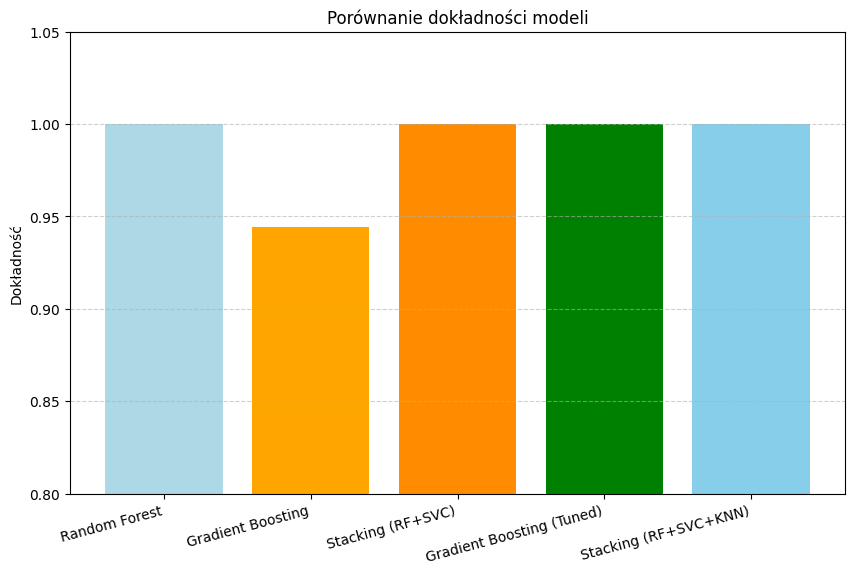

Wyniki:
Random Forest: 1.0000
Gradient Boosting: 0.9444
Stacking (RF+SVC): 1.0000
Gradient Boosting (Tuned): 1.0000
Stacking (RF+SVC+KNN): 1.0000
Dokładność - Iris dataset: 1.0000


In [24]:
plt.figure(figsize=(10, 6))
models = list(results_wine.keys())
accuracy = list(results_wine.values())
bars = plt.bar(
    models, accuracy, color=["lightblue", "orange", "darkorange", "green", "skyblue"]
)
plt.ylabel("Dokładność")
plt.title("Porównanie dokładności modeli")
plt.xticks(rotation=15, ha="right")
plt.ylim(0.8, 1.05)
plt.grid(axis="y", linestyle="--", alpha=0.6)
plt.show()

print("Wyniki:")
for k, v in results_wine.items():
    print(f"{k}: {v:.4f}")
print(f"Dokładność - Iris dataset: {acc_iris:.4f}")